In [1]:
import os
import cv2
from collections import Counter

def get_image_sizes(base_dir):
    sizes = []
    counts = {}

    for label_folder in os.listdir(base_dir):
        label_path = os.path.join(base_dir, label_folder)

        images_path = os.path.join(label_path, 'images')
        label_count = 0

        for image_name in os.listdir(images_path):
            image_path = os.path.join(images_path, image_name)
            img = cv2.imread(image_path)
            h, w = img.shape[:2]
            sizes.append((w, h))
            label_count += 1

        counts[label_folder] = label_count

    return sizes, counts

### Lung Segmentation Data

In [2]:
train_lung_dir  = 'archive/Lung Segmentation Data/Lung Segmentation Data/Train'
val_lung_dir    = 'archive/Lung Segmentation Data/Lung Segmentation Data/Val'
test_lung_dir   = 'archive/Lung Segmentation Data/Lung Segmentation Data/Test'


train_sizes, train_counts = get_image_sizes(train_lung_dir)
val_sizes, val_counts = get_image_sizes(val_lung_dir)
test_sizes, test_counts = get_image_sizes(test_lung_dir)

print("=== Image Counts ===")
for split, counts in [("Train", train_counts), ("Val", val_counts), ("Test", test_counts)]:
    print(f"\n{split}:")
    for label, count in counts.items():
        print(f"  {label}: {count}")
    print(f"  Total: {sum(counts.values())}")

=== Image Counts ===

Train:
  COVID-19: 7658
  Normal: 6849
  Non-COVID: 7208
  Total: 21715

Val:
  COVID-19: 1903
  Normal: 1712
  Non-COVID: 1802
  Total: 5417

Test:
  COVID-19: 2395
  Normal: 2140
  Non-COVID: 2253
  Total: 6788


In [3]:
print("=== Image Sizes ===")
# Combine all sizes
all_sizes = train_sizes + val_sizes + test_sizes

# Get unique sizes
unique_sizes = set(all_sizes)
print(f"Unique sizes found: {len(unique_sizes)}")
for size in sorted(unique_sizes):
    count = all_sizes.count(size)
    print(f"  {size[0]}x{size[1]}: {count} images")

=== Image Sizes ===
Unique sizes found: 1
  256x256: 33920 images


### Infection Segmentation Data

In [4]:
train_infect_dir  = 'archive/Infection Segmentation Data/Infection Segmentation Data/Train'
val_infect_dir    = 'archive/Infection Segmentation Data/Infection Segmentation Data/Val'
test_infect_dir   = 'archive/Infection Segmentation Data/Infection Segmentation Data/Test'


train_sizes, train_counts = get_image_sizes(train_infect_dir)
val_sizes, val_counts = get_image_sizes(val_infect_dir)
test_sizes, test_counts = get_image_sizes(test_infect_dir)

print("=== Image Counts ===")
for split, counts in [("Train", train_counts), ("Val", val_counts), ("Test", test_counts)]:
    print(f"\n{split}:")
    for label, count in counts.items():
        print(f"  {label}: {count}")
    print(f"  Total: {sum(counts.values())}")

=== Image Counts ===

Train:
  COVID-19: 1864
  Normal: 932
  Non-COVID: 932
  Total: 3728

Val:
  COVID-19: 466
  Normal: 233
  Non-COVID: 233
  Total: 932

Test:
  COVID-19: 583
  Normal: 291
  Non-COVID: 292
  Total: 1166


In [5]:
print("=== Image Sizes ===")
# Combine all sizes
all_sizes = train_sizes + val_sizes + test_sizes

# Get unique sizes
unique_sizes = set(all_sizes)
print(f"Unique sizes found: {len(unique_sizes)}")
for size in sorted(unique_sizes):
    count = all_sizes.count(size)
    print(f"  {size[0]}x{size[1]}: {count} images")

=== Image Sizes ===
Unique sizes found: 1
  256x256: 5826 images


## Key Differences Between Lung and Infection Segmentation Datasets

### 1. **Segmentation Target**
- **Lung Segmentation**: Focuses on identifying and segmenting the entire lung region (both left and right lungs)
- **Infection Segmentation**: Focuses on identifying and segmenting infected/pathological regions within the lungs

### 2. **Clinical Purpose**
- **Lung Segmentation**: Used for lung boundary detection, volume measurement, and region-of-interest extraction
- **Infection Segmentation**: Used for detecting and quantifying COVID-19 infection spread and severity

### 3. **Label Distribution**
- **Lung Segmentation**: Different distribution of images across label categories
- **Infection Segmentation**: Different distribution of images across label categories
- *(Run the cells to see actual counts per label)*

### 4. **Image Size Variations**
- Both datasets have varying image dimensions
- Number and distribution of unique sizes may differ between datasets
- *(Run the size analysis cells to compare unique dimensions)*

### 5. **Dataset Size**
- Total number of images differs between the two segmentation tasks
- Train/Val/Test split ratios may vary

### 6. **Segmentation Complexity**
- **Lung Segmentation**: Generally more consistent mask shapes (bilateral lung regions)
- **Infection Segmentation**: More variable mask patterns depending on infection location and severity

**Note**: Run all analysis cells to populate specific statistics and counts for each dataset.

Lung Segmentation Dataset Samples:


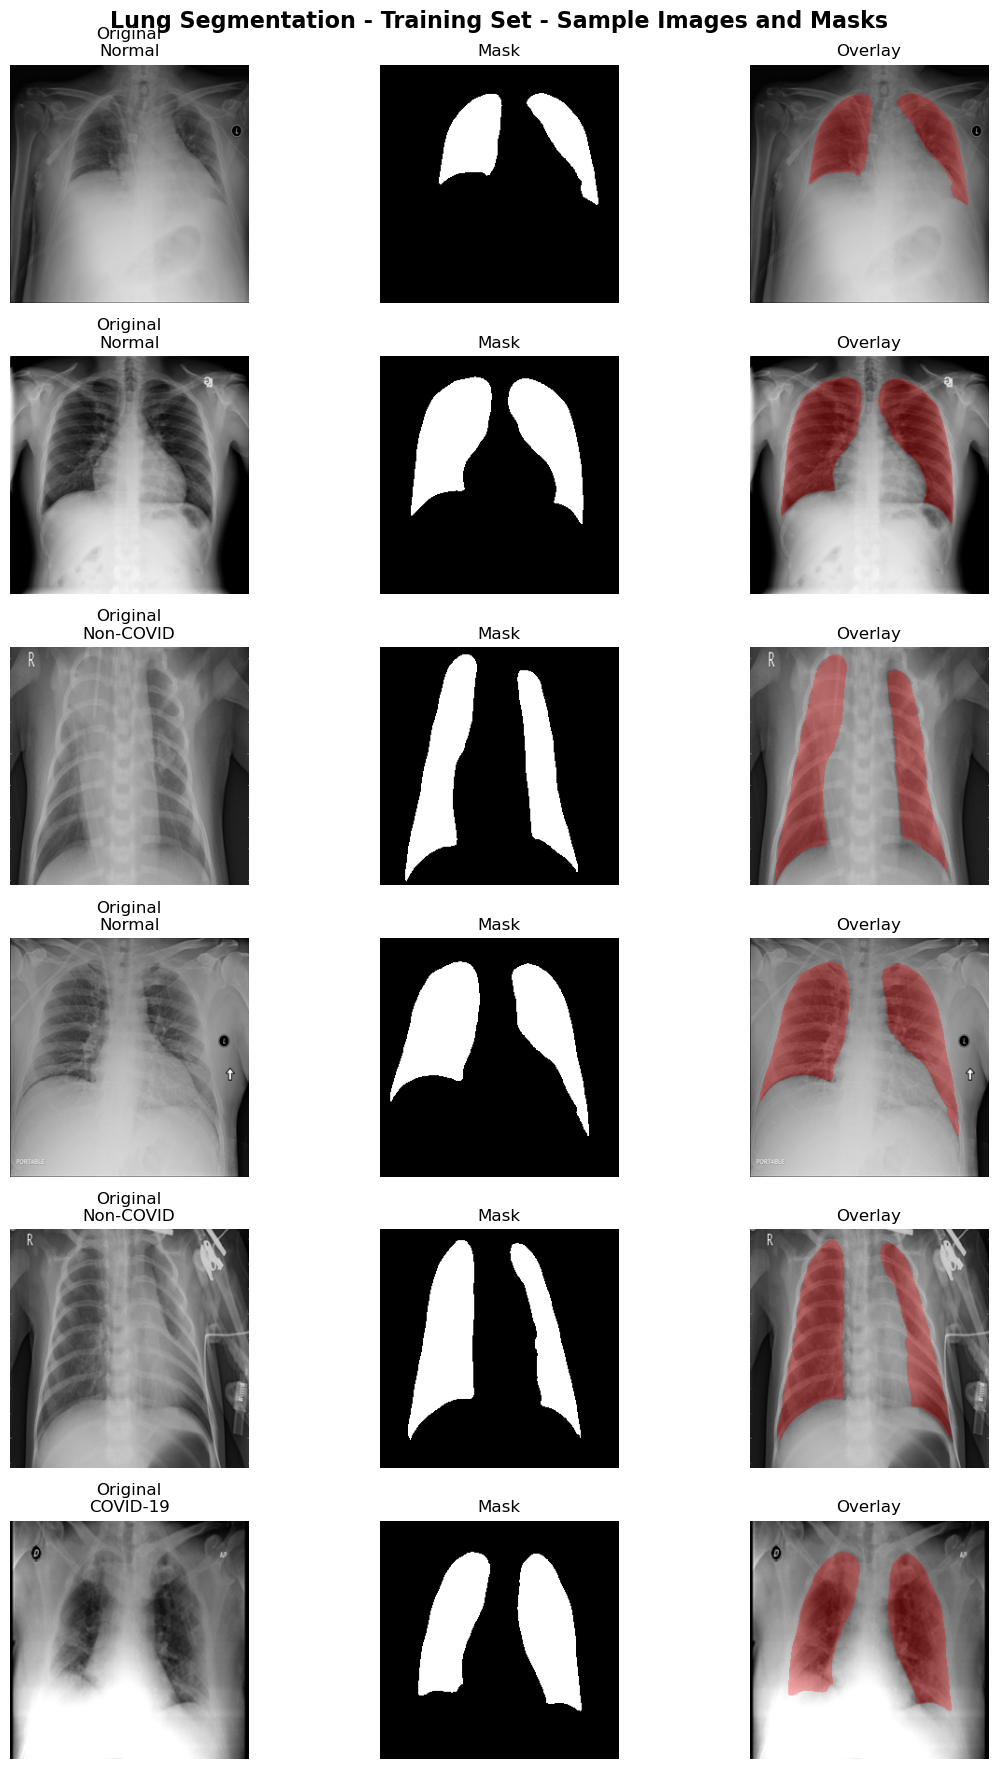

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random

def plot_samples(base_dir, dataset_name, num_samples=6):
    fig, axes = plt.subplots(num_samples, 3, figsize=(12, num_samples * 3))
    fig.suptitle(f'{dataset_name} - Sample Images and Masks', fontsize=16, fontweight='bold')
    
    # Get all label folders
    label_folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
    
    samples_plotted = 0
    attempts = 0
    max_attempts = num_samples * 10  # Prevent infinite loop
    
    while samples_plotted < num_samples and attempts < max_attempts:
        attempts += 1
        
        # Randomly select a label folder
        label_folder = random.choice(label_folders)
        label_path = os.path.join(base_dir, label_folder)
        
        images_path = os.path.join(label_path, 'images')
        masks_path = os.path.join(label_path, 'lung masks')  # Changed from 'masks' to 'lung masks'
        
        # Check if masks folder exists
        if not os.path.exists(masks_path):
            print(f"Warning: masks folder not found for {label_folder}")
            continue
        
        # Get random image
        image_files = os.listdir(images_path)
        if not image_files:
            continue
            
        image_name = random.choice(image_files)
        
        # Load image
        img = cv2.imread(os.path.join(images_path, image_name))
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Load mask
        mask = cv2.imread(os.path.join(masks_path, image_name), cv2.IMREAD_GRAYSCALE)
        if mask is None:
            print(f"Warning: Could not load mask for {image_name}")
            continue
        
        # Create overlay
        overlay = img.copy()
        overlay[mask > 0] = [255, 0, 0]  # Red color for mask
        blended = cv2.addWeighted(img, 0.7, overlay, 0.3, 0)
        
        # Plot
        idx = samples_plotted
        axes[idx, 0].imshow(img)
        axes[idx, 0].set_title(f'Original\n{label_folder}')
        axes[idx, 0].axis('off')
        
        axes[idx, 1].imshow(mask, cmap='gray')
        axes[idx, 1].set_title('Mask')
        axes[idx, 1].axis('off')
        
        axes[idx, 2].imshow(blended)
        axes[idx, 2].set_title('Overlay')
        axes[idx, 2].axis('off')
        
        samples_plotted += 1
    
    plt.tight_layout()
    plt.show()

# Plot Lung Segmentation samples
print("Lung Segmentation Dataset Samples:")
plot_samples(train_lung_dir, "Lung Segmentation - Training Set")

Infection Segmentation Dataset Samples:


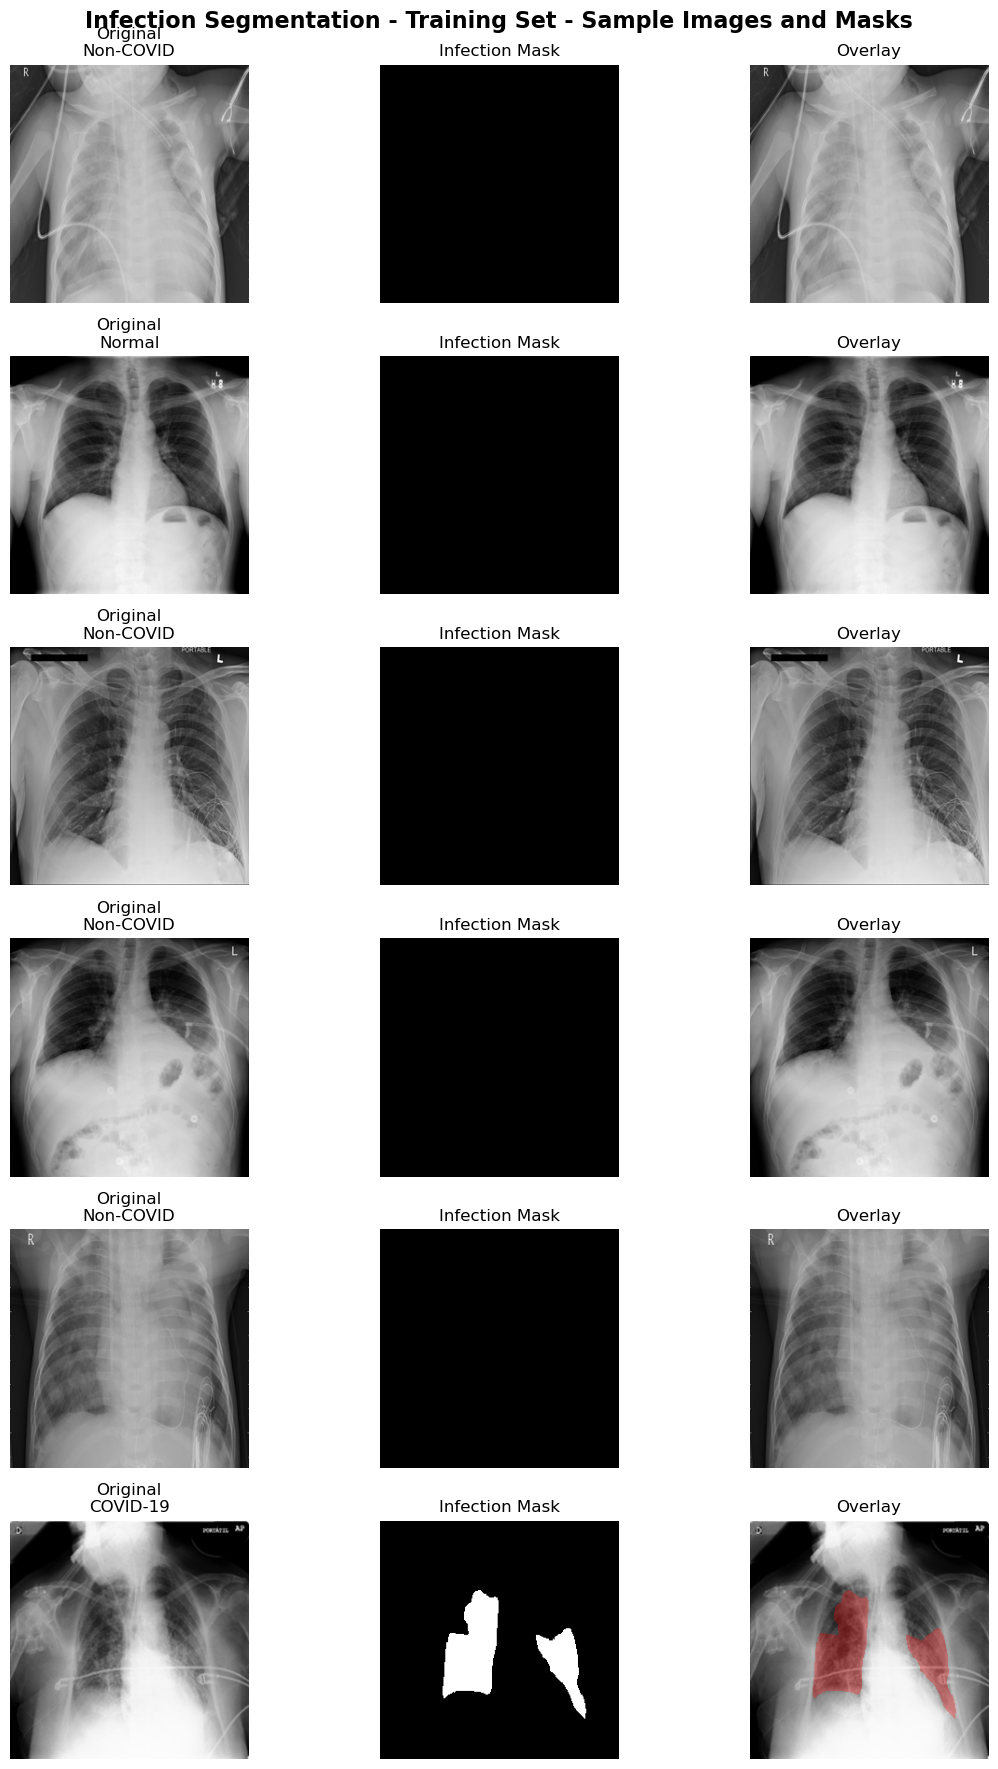

In [10]:
# For Infection Segmentation, use 'infection masks'
def plot_infection_samples(base_dir, dataset_name, num_samples=6):
    fig, axes = plt.subplots(num_samples, 3, figsize=(12, num_samples * 3))
    fig.suptitle(f'{dataset_name} - Sample Images and Masks', fontsize=16, fontweight='bold')
    
    label_folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
    
    samples_plotted = 0
    attempts = 0
    max_attempts = num_samples * 10
    
    while samples_plotted < num_samples and attempts < max_attempts:
        attempts += 1
        
        label_folder = random.choice(label_folders)
        label_path = os.path.join(base_dir, label_folder)
        
        images_path = os.path.join(label_path, 'images')
        masks_path = os.path.join(label_path, 'infection masks')  # Use 'infection masks'
        
        if not os.path.exists(masks_path):
            continue
        
        image_files = os.listdir(images_path)
        if not image_files:
            continue
            
        image_name = random.choice(image_files)
        
        img = cv2.imread(os.path.join(images_path, image_name))
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        mask = cv2.imread(os.path.join(masks_path, image_name), cv2.IMREAD_GRAYSCALE)
        if mask is None:
            continue
        
        overlay = img.copy()
        overlay[mask > 0] = [255, 0, 0]
        blended = cv2.addWeighted(img, 0.7, overlay, 0.3, 0)
        
        idx = samples_plotted
        axes[idx, 0].imshow(img)
        axes[idx, 0].set_title(f'Original\n{label_folder}')
        axes[idx, 0].axis('off')
        
        axes[idx, 1].imshow(mask, cmap='gray')
        axes[idx, 1].set_title('Infection Mask')
        axes[idx, 1].axis('off')
        
        axes[idx, 2].imshow(blended)
        axes[idx, 2].set_title('Overlay')
        axes[idx, 2].axis('off')
        
        samples_plotted += 1
    
    plt.tight_layout()
    plt.show()

print("Infection Segmentation Dataset Samples:")
plot_infection_samples(train_infect_dir, "Infection Segmentation - Training Set")